# Diamonds regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
columns = ["carat", "depth", "table", "x", "y", "z", "price"]

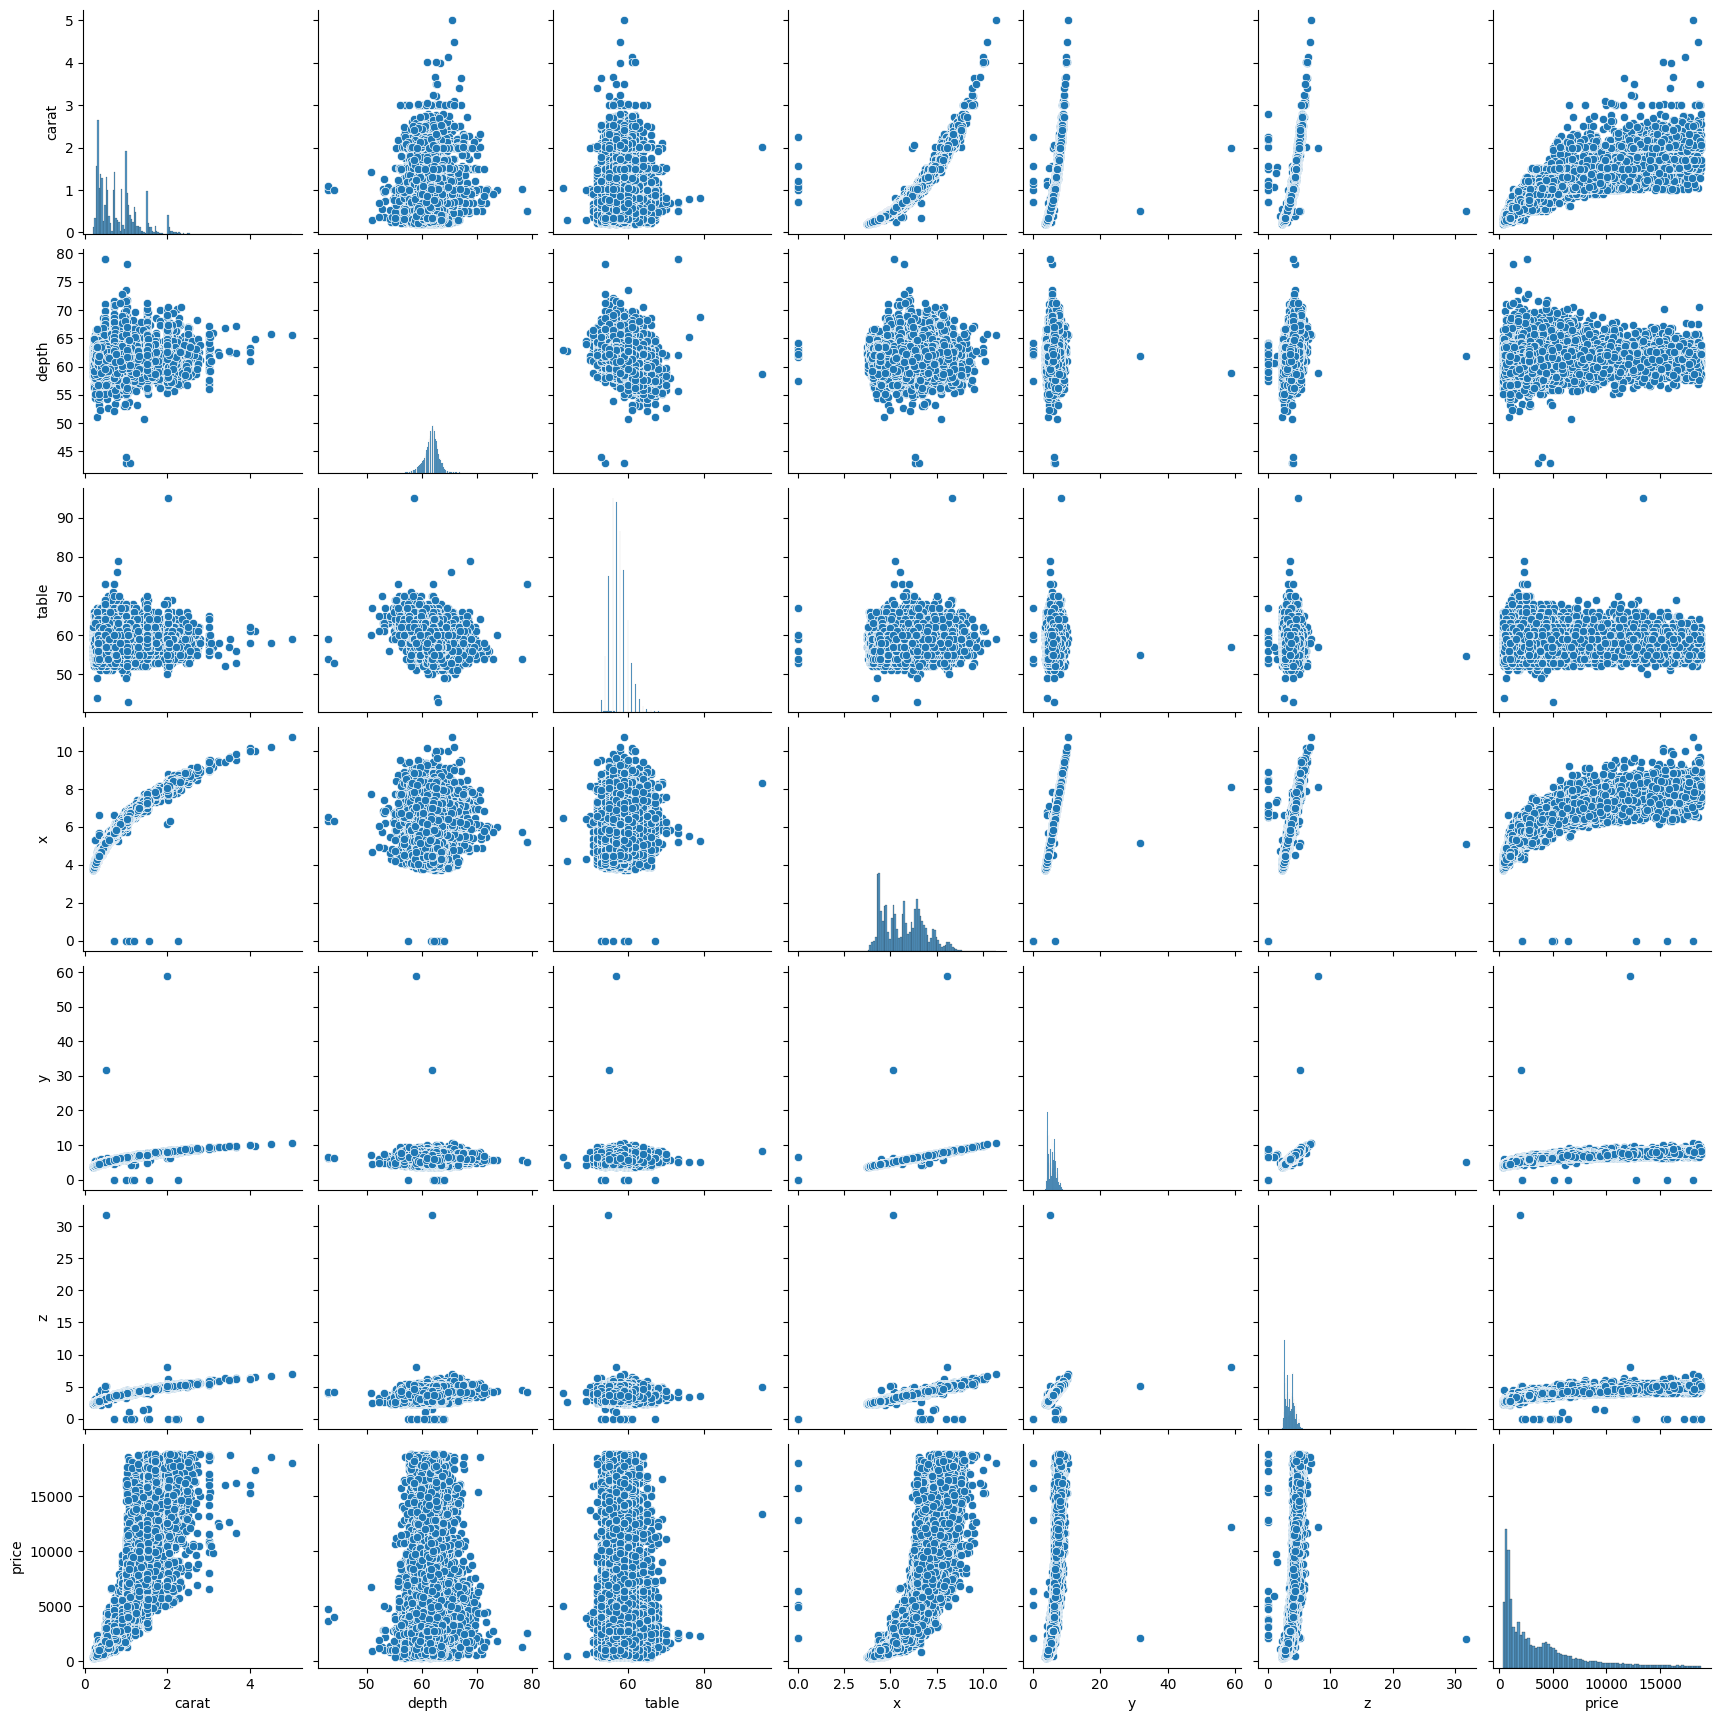

In [4]:
sns.pairplot(df[columns])

In [5]:
df[columns].corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.028266,0.181643,0.975095,0.951724,0.953389,0.921593
depth,0.028266,1.000000,-0.295735,-0.025252,-0.029301,0.094964,-0.010613
table,0.181643,-0.295735,1.000000,0.195365,0.183783,0.150955,0.127155
x,0.975095,-0.025252,0.195365,1.000000,0.974702,0.970772,0.884438
y,0.951724,-0.029301,0.183783,0.974702,1.000000,0.952007,0.865425
z,0.953389,0.094964,0.150955,0.970772,0.952007,1.000000,0.861253
price,0.921593,-0.010613,0.127155,0.884438,0.865425,0.861253,1.000000


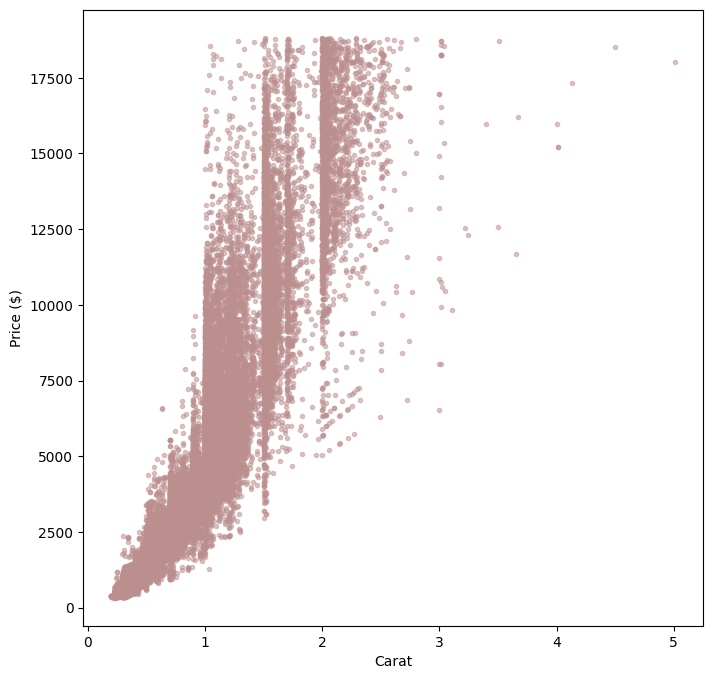

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(df["carat"], df["price"], color="RosyBrown", alpha=0.5, marker=".")
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.show()

In [7]:
Y = df["price"]
X = sm.add_constant(df["carat"]) # adds intercept!

In [8]:
X

,const,carat
0,1.0,0.23
1,1.0,0.21
2,1.0,0.23
3,1.0,0.29
4,1.0,0.31
...,...,...
53936,1.0,0.72
53937,1.0,0.72
53938,1.0,0.70
53939,1.0,0.86


In [9]:
Y

0         326
1         326
2         327
3         334
4         335
         ... 
53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, Length: 53941, dtype: int64

In [10]:
model = sm.OLS(Y, X) # must start with Y
results = model.fit() # training process

In [11]:
results

In [12]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:27:25   Log-Likelihood:            -4.7274e+05
No. Observations:               53941   AIC:                         9.455e+05
Df Residuals:                   53939   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3385     13.055   -172.831      0.0

In [13]:
# equation of line of best fit -> price = m*carat + b
results.params # coefficients

const   -2256.338481
carat    7756.379377
dtype: float64

In [14]:
type(results.params)

pandas.core.series.Series

In [15]:
m = results.params["carat"]
b = results.params["const"]

In [16]:
carat = 1.5
price = m*carat + b

In [17]:
print(price)

9378.230584795818


In [18]:
# generate new possible diamonds
# random samples from uniform distribution
carats = np.random.uniform(low=0.5, high=2.5, size=20)

In [19]:
print(carats)

[1.59762358 1.59908885 1.82387471 2.39019557 1.0171531  1.08819782
 2.29668421 0.5478777  2.37533027 1.92984577 1.61683476 1.05243879
 1.01900173 2.24574941 2.37261507 1.11699864 2.12699862 1.56830848
 0.84881945 2.26332523]


In [20]:
type(carats)

numpy.ndarray

In [21]:
prices = m*carats + b

In [22]:
print(prices) # estimated prices for each diamond

[10135.43613913 10146.80129558 11890.32569643 16282.9251246
  5633.08686688  6184.13661022 15557.61556643  1993.20882829
 16167.62427826 12712.27741708 10284.44533601  5906.77607473
  5647.42550023 15162.54591936 16146.56411536  6407.52671112
 14241.46976103  9908.05703488  4327.42718396 15298.87068475]


In [23]:
# multiple linear regression model
predictors = [
    "carat",
    "x"
]

Y = df["price"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()

In [24]:
X

,const,carat,x
0,1.0,0.23,3.95
1,1.0,0.21,3.89
2,1.0,0.23,4.05
3,1.0,0.29,4.20
4,1.0,0.31,4.34
...,...,...,...
53936,1.0,0.72,5.75
53937,1.0,0.72,5.69
53938,1.0,0.70,5.66
53939,1.0,0.86,6.15


In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 1.570e+05
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:27:26   Log-Likelihood:            -4.7199e+05
No. Observations:               53941   AIC:                         9.440e+05
Df Residuals:                   53938   BIC:                         9.440e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1737.7139    103.622     16.770      0.0

In [26]:
df.loc[20107]

carat       1.5
cut        Good
color         I
clarity     SI1
depth      64.0
table      60.0
price      8580
x          7.13
y          7.25
z           4.6
Name: 20107, dtype: object

In [27]:
carat = 1.5
x = 7.13
m1 = results.params["carat"]
m2 = results.params["x"]
b =results.params["const"]

price = m1*carat + m2*x + b

In [28]:
print(price)

9605.36613408892


In [29]:
# multiple linear regression model
predictors = [
    "carat",
    "x",
    "y",
    "z"
]

Y = df["price"]
X = sm.add_constant(df[predictors])
model = sm.OLS(Y, X)
results = model.fit()

In [30]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                 7.892e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:27:26   Log-Likelihood:            -4.7188e+05
No. Observations:               53941   AIC:                         9.438e+05
Df Residuals:                   53936   BIC:                         9.438e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1921.0000    104.372     18.405      0.0

In [31]:
carat = 1.5
x = 7.13
y = 7.25
z = 4.6
m1 = results.params["carat"]
m2 = results.params["x"]
m3 = results.params["y"]
m4 = results.params["z"]
b =results.params["const"]

price = m1*carat + m2*x + m3*y + m4*z + b

In [32]:
print(price)

9520.783644767513


In [33]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [34]:
print(pd.unique(df["color"].sort_values()))

['D' 'E' 'F' 'G' 'H' 'I' 'J']


/tmp/ipykernel_92/2185394216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df, x="color", y="price", order=color_order, palette="YlOrBr")


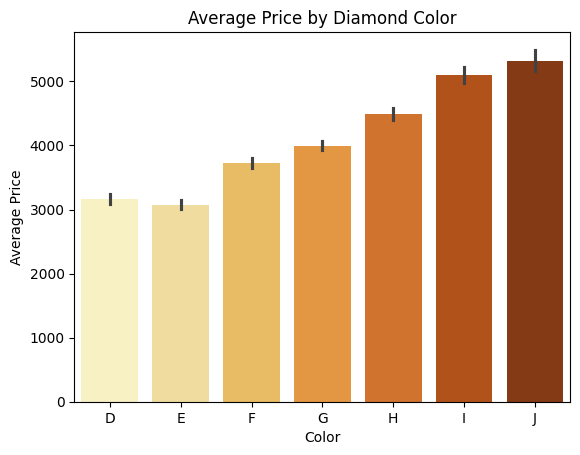

In [35]:
# Set the order of colors from D to J
color_order = ["D", "E", "F", "G", "H", "I", "J"]

# Create the barplot
sns.barplot(df, x="color", y="price", order=color_order, palette="YlOrBr")

# Customize plot
plt.title("Average Price by Diamond Color")
plt.xlabel("Color")
plt.ylabel("Average Price")
plt.show()

In [36]:
predictors = [
    "carat",
    "color"
]

Y = df["price"]
X = sm.add_constant(pd.get_dummies(df[predictors], columns=["color"], drop_first=True, dtype=int))

In [37]:
X.head()

,const,carat,color_E,color_F,color_G,color_H,color_I,color_J
0,1.0,0.23,1,0,0,0,0,0
1,1.0,0.21,1,0,0,0,0,0
2,1.0,0.23,1,0,0,0,0,0
3,1.0,0.29,0,0,0,0,1,0
4,1.0,0.31,0,0,0,0,0,1


In [38]:
X_train = X[1000:]
X_test = X[:1000]

In [39]:
Y_train = Y[1000:]
Y_test = Y[:1000]

In [40]:
print(len(X_test))
print(len(Y_test))

1000
1000


In [41]:
print(len(X_train))
print(len(Y_train))

52941
52941


In [42]:
model = sm.OLS(Y_train, X_train)
results = model.fit()

In [43]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 4.805e+04
Date:                Sun, 12 Jan 2025   Prob (F-statistic):               0.00
Time:                        03:27:27   Log-Likelihood:            -4.6119e+05
No. Observations:               52941   AIC:                         9.224e+05
Df Residuals:                   52933   BIC:                         9.225e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2136.8108     20.269   -105.421      0.0

In [44]:
diamond1 = X_test.loc[0]

In [45]:
diamond1

const      1.00
carat      0.23
color_E    1.00
color_F    0.00
color_G    0.00
color_H    0.00
color_I    0.00
color_J    0.00
Name: 0, dtype: float64

In [46]:
results.predict(diamond1)

None   -376.053034
dtype: float64

In [47]:
Y_test.loc[0]

np.int64(326)

In [48]:
predicted = results.predict(X_test)

In [49]:
type(predicted)

pandas.core.series.Series

In [50]:
predicted.sample(10)

640     3431.274790
701      363.359158
760    13099.748194
192      277.650045
778     2293.916142
564     2463.467064
587    10439.631173
868      277.650045
187     2527.370146
144       35.698114
dtype: float64

In [51]:
predicted.describe()

count     1000.000000
mean      4176.332288
std       3903.570993
min      -1631.432129
25%        995.007912
50%       3431.274790
75%       6189.103560
max      26571.057289
dtype: float64